# Домашнее задание 3

1) [1 балл] Реализуйте чтение изображений, лежащих в /data/imgs/arrow (как в демо с калибровкой камеры с семинара). Вся обязательная часть задания выполняется с этими изображениями

1) [2 балла] Реализуйте нахождение расстояния от камеры до листка, учитывая, что это тот же листок, что был в первом демо

2) [3 балла] Реализуйте приведение изображения листка к "виду сверху"

3) [6 баллов] Реализуйте определение направления, в котором указывает стрелка. Можно использовать скелетонизацию из первого семинара по зрению: получить маску темной области (стрелки) внутри изображения листка, применить скелетонизацию, вычислить направление. Можно поступить иначе: после нахождения маски вычислить градиенты Собеля по x и y и проанализировать их направления. P.S. Можно использовать и полностью свой метод

4) [3 балла] Доп. задача 1: Примените написанный Вами код к видео https://drive.google.com/file/d/1AQhg2lL5FL4edlOcxY2SHOOZ-v9TgHBD/view?usp=sharing. Загрузите видео на свой гугл диск, а затем дополните имеющийся код монтированием диска и чтением в цикле кадров видео, приведёнными в конце семинара

5) [5 баллов] Доп. задача 2: определите, нормально ли видно листок в кадре. На некоторых кадрах его видно не полностью, один или больше уголков находятся за кадром. Это можно автоматически обнаруживать, к примеру используя размеры стрелки, и выводить на соответствующем кадре маркер - текст или цветную метку

In [78]:
import numpy as np
import cv2
import time
import os
import math
import sys
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


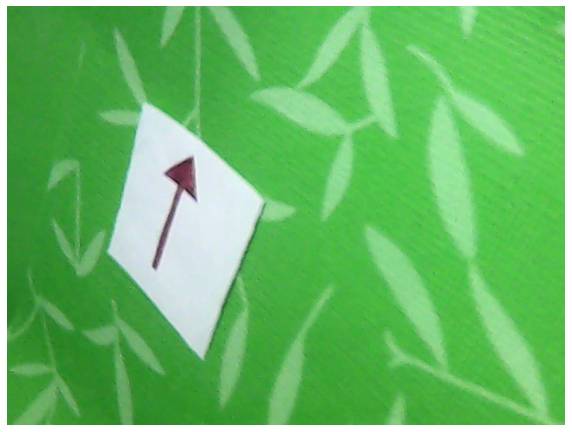

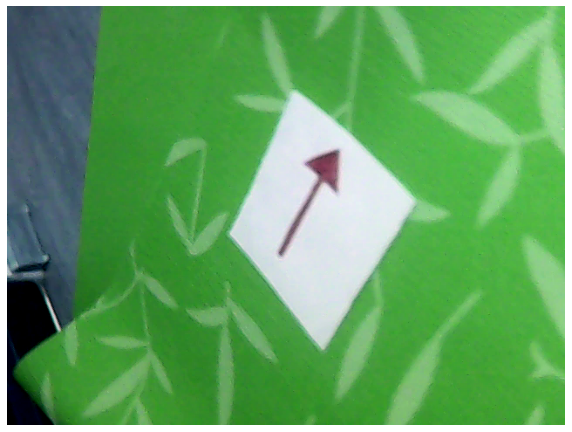

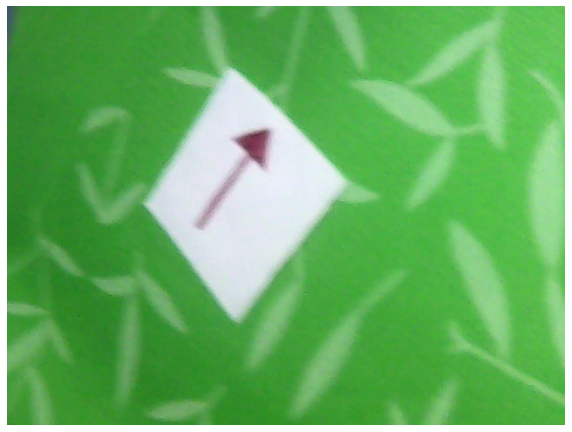

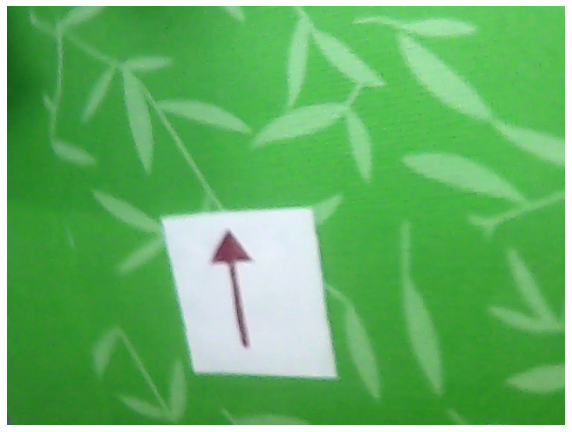

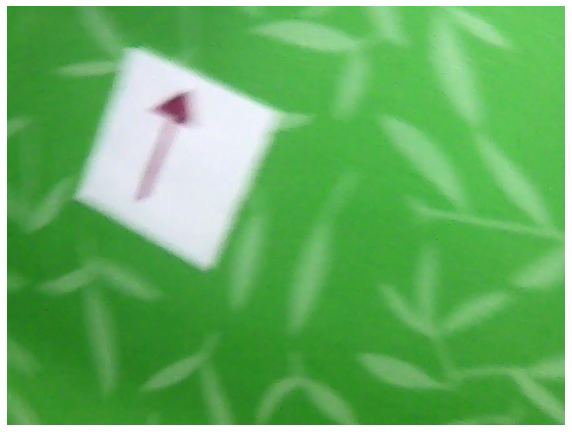

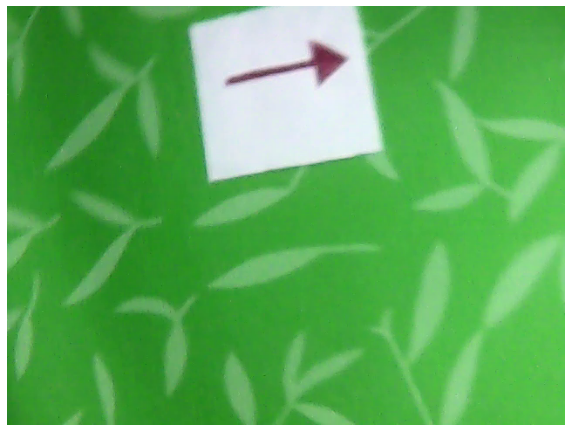

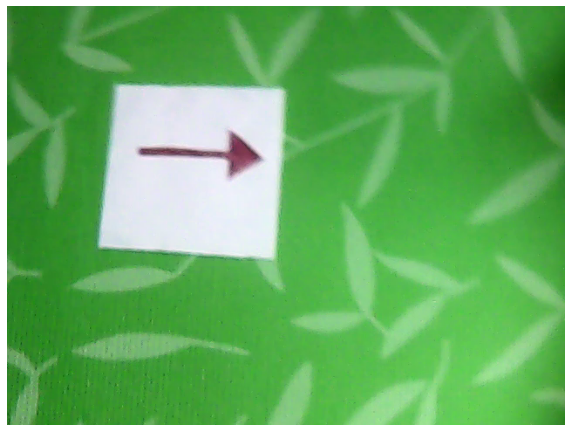

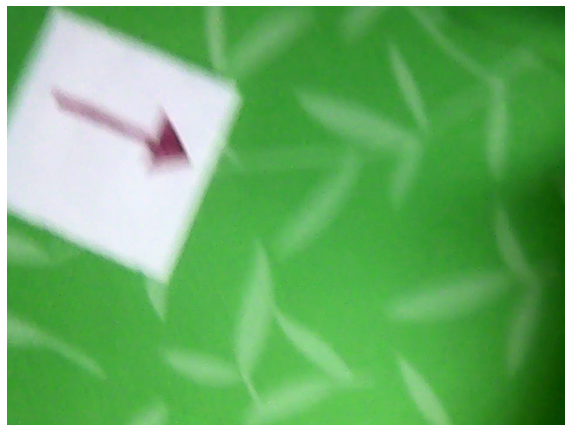

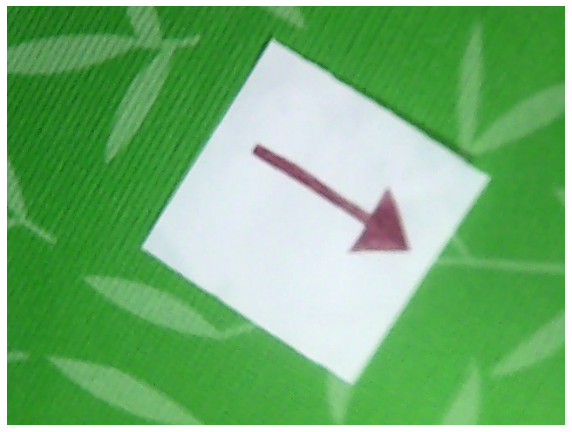

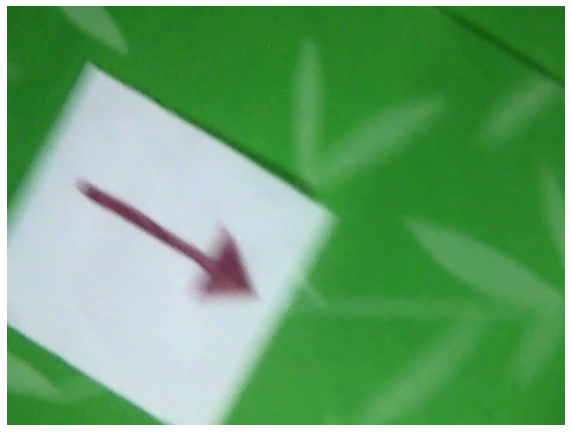

In [79]:
import glob
plt.rcParams["figure.figsize"] = (10,10)
images = glob.glob('../data/imgs/arrow/*.png')
for fname in images:
    img = cv2.imread(fname, cv2.IMREAD_COLOR)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

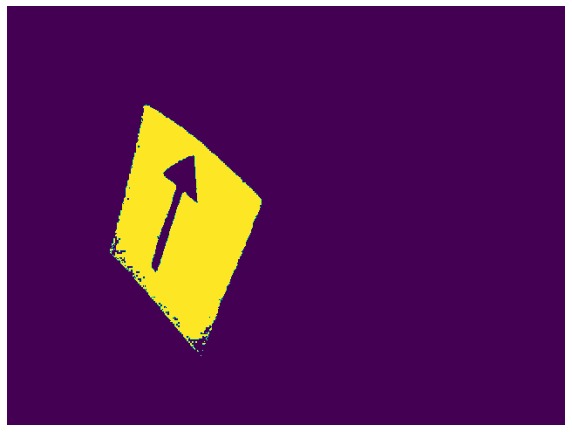

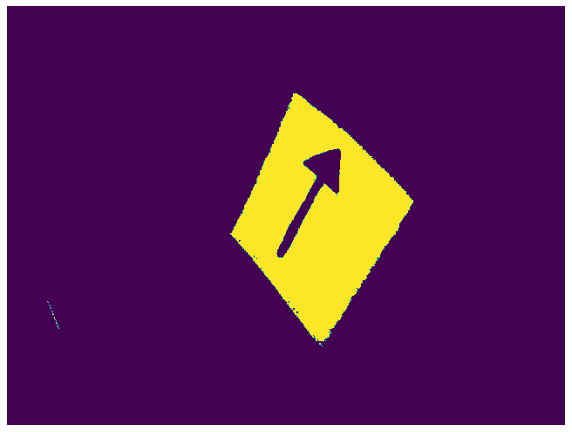

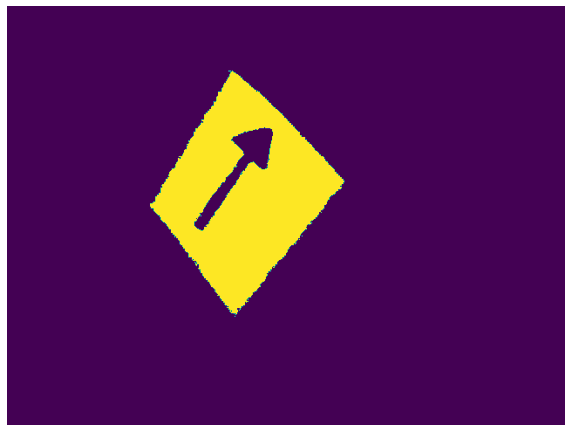

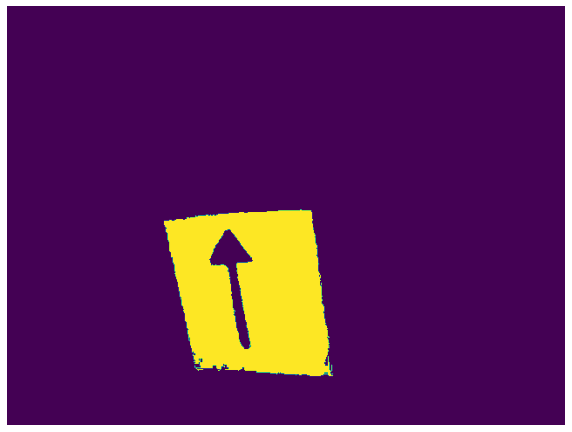

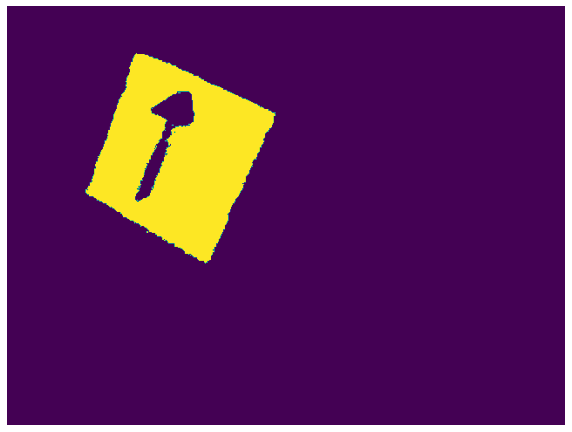

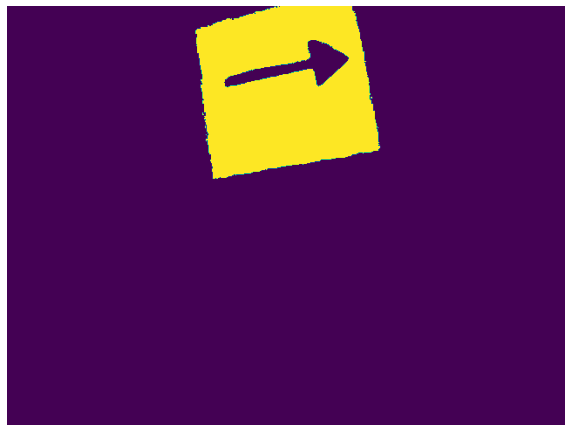

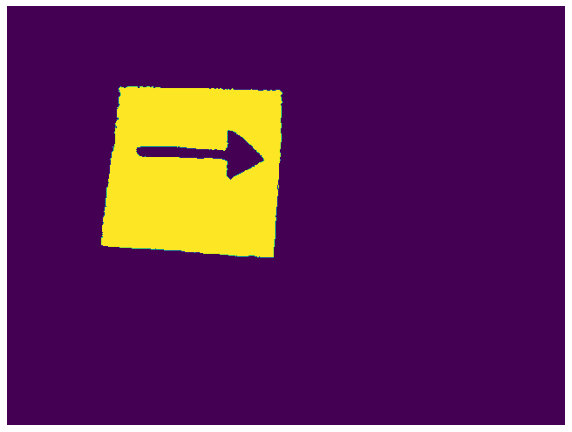

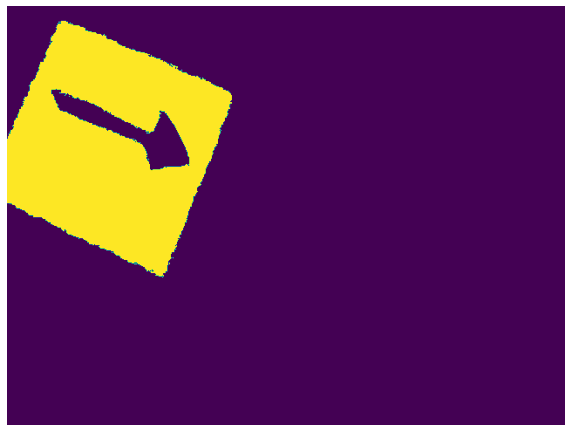

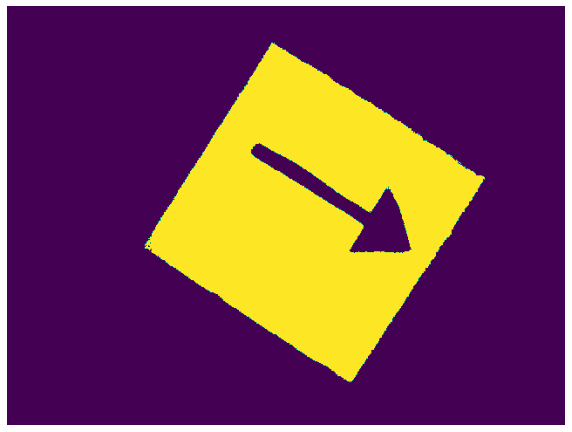

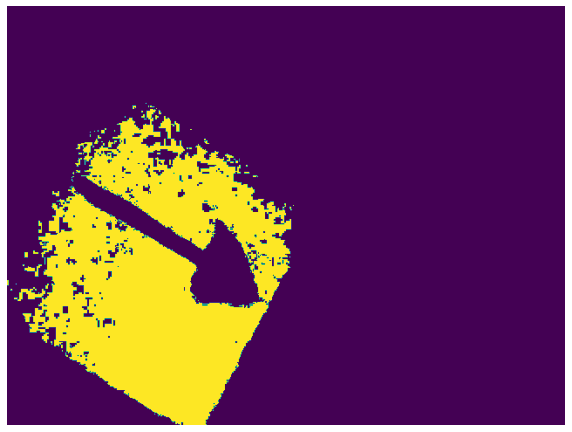

In [80]:
low_th  = (200, 200, 200)
high_th = (255, 255, 255)
for fname in images:
    img = cv2.imread(fname, cv2.IMREAD_COLOR)
    mask = cv2.inRange (img, low_th, high_th)
    plt.imshow (mask)
    plt.axis ('off')
    plt.show ()

Found and checked rectangle approximations for images.

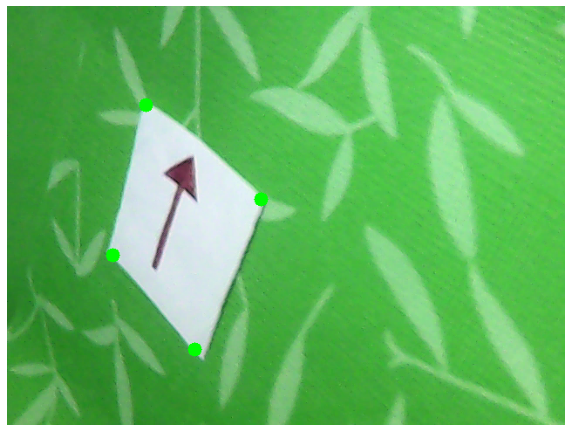

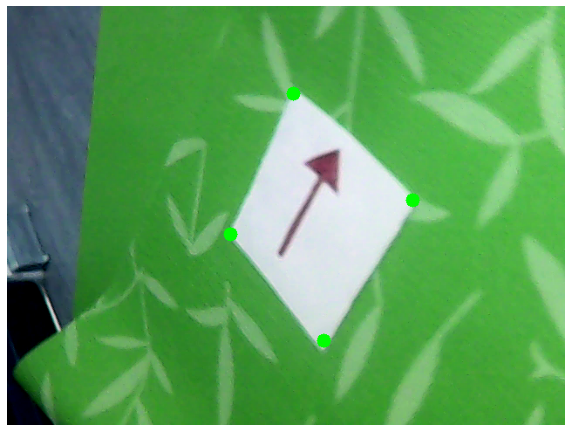

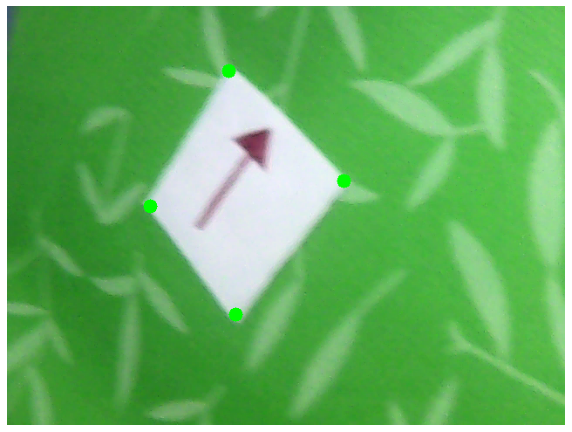

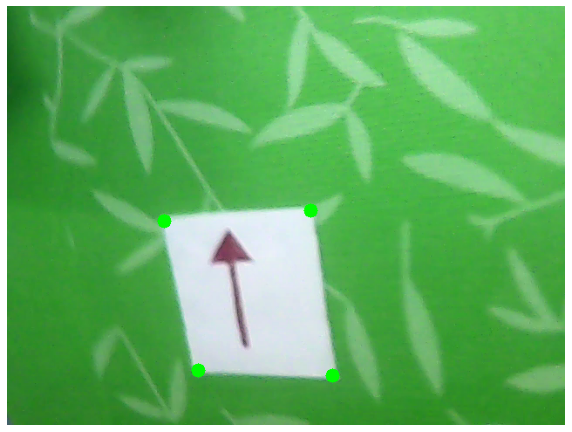

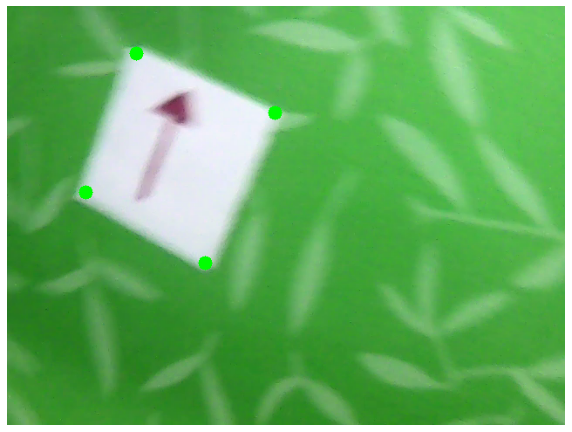

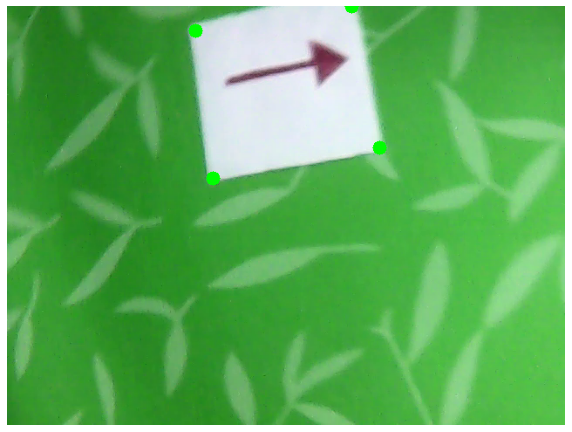

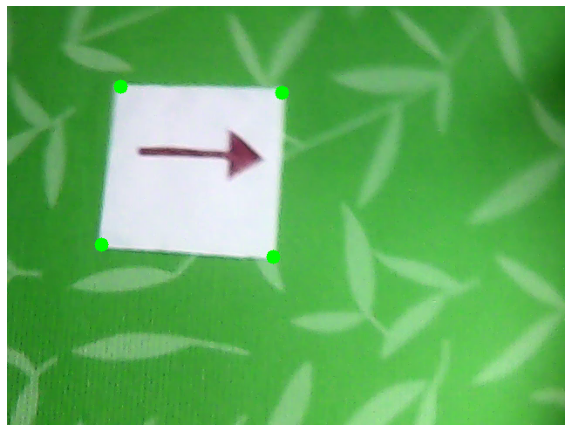

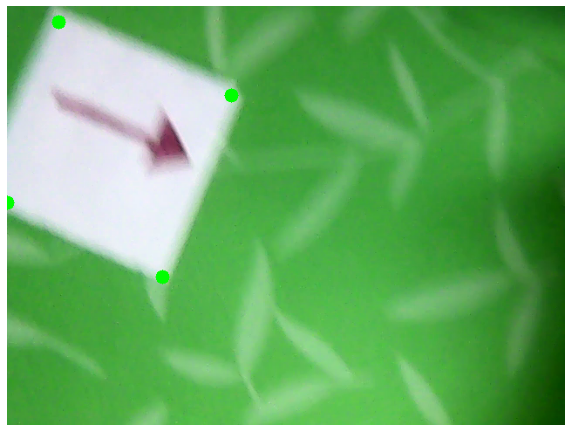

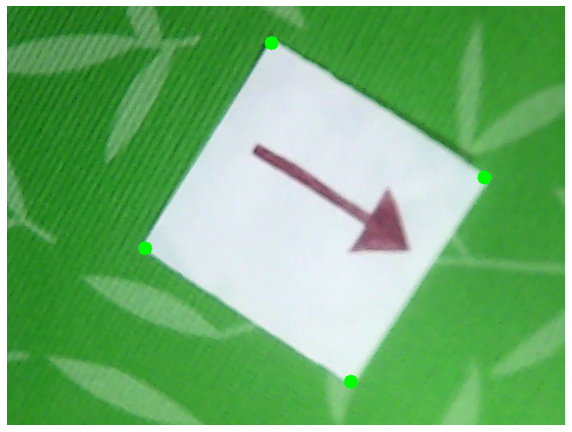

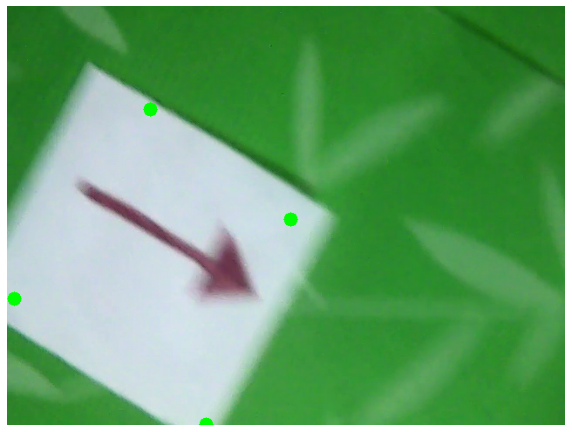

In [81]:
plt.rcParams["figure.figsize"] = (10,10)
low_th  = (200, 200, 200)
high_th = (255, 255, 255)
for fname in images:
    img = cv2.imread(fname, cv2.IMREAD_COLOR)
    mask = cv2.inRange (img, low_th, high_th)
    contours, hierarchy = cv2.findContours (mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    lens = np.array([cv2.arcLength(cnt, True) for cnt in contours]) 
    cnt = contours[np.argmax(lens)]
#     print(lens)

    approx = cv2.convexHull (cnt)

    epsilon = 0.05 * cv2.arcLength (approx, True)

    approx = cv2.approxPolyDP (approx, epsilon, True)

    contour_marked = cv2.drawContours (img, approx, -1, (0, 255, 0), 15)

    plt.imshow (contour_marked)
    plt.axis ('off')
    plt.show ()
cv2.destroyAllWindows()

In [82]:
def find_contour (img, low_th, high_th):
    img_rgb = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange (img, low_th, high_th)
    contours, hierarchy = cv2.findContours (mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # change this part: finding the biggest contour from contours
    lens = np.array([cv2.arcLength(cnt, True) for cnt in contours]) 
    cnt = contours[np.argmax(lens)]
    
    approx = cv2.convexHull (cnt)

    epsilon = 0.05 * cv2.arcLength (approx, True)

    approx = cv2.approxPolyDP (approx, epsilon, True)

    approx = cv2.approxPolyDP (approx, epsilon, True)

    return approx

In [83]:
def find_distance (img):
    low_th  = (200, 200, 200)
    high_th = (255, 255, 255)

    contour = find_contour (img, low_th, high_th)
    
    length = cv2.arcLength (contour, True)
#     print(length)
    
#     print (contour)
    if length != 0:
        distance = 180.0 * 364 / length
    else:
        return 'error'
    return distance

Distance from sheet for all images with arrow.

In [84]:
print("Distance from sheet:")
for fname in images:
    img = cv2.imread(fname, cv2.IMREAD_COLOR)
    print(np.round(find_distance(img), 2), 'cm   for image:', fname)

Distance from sheet:
96.65 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m22s212.png
91.93 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m27s294.png
91.42 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m29s941.png
95.15 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m33s362.png
94.82 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m36s056.png
92.2 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m41s874.png
86.99 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m44s163.png
77.08 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m46s644.png
58.21 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m49s487.png
66.26 cm   for image: ../data/imgs/arrow\vlcsnap-2020-10-21-18h01m51s638.png
